Importation des librairy qui vont bien pour les svm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import seed
from numpy.random import randn
import pandas as pd 
import seaborn as sns

Création de données linéairement séparables

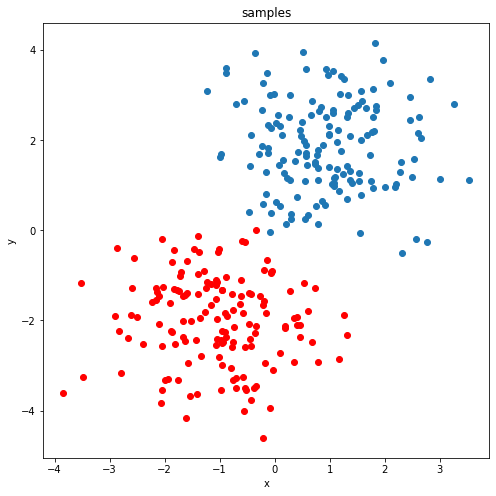

In [2]:
nbi=150
x1=randn(nbi,2)+[1,2]
x2=randn(nbi,2)-[1,2]

xapp=np.concatenate((x1, x2), axis=0)
xsize=xapp.shape
plt.figure(figsize=(8,8))
plt.scatter(xapp[0:nbi-1,0],xapp[0:nbi-1:,1])
plt.scatter(xapp[nbi:2*nbi-1,0],xapp[nbi:2*nbi-1:,1],c='r')
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("samples") 
plt.show()

Création des données de test

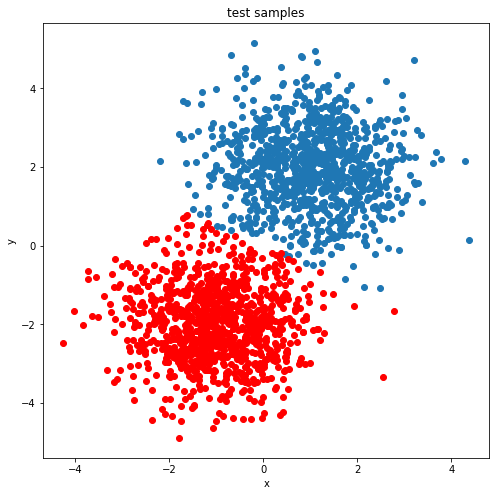

In [3]:
nbt=1000
x1=randn(nbt,2)+[1,2]
x2=randn(nbt,2)-[1,2]

xt=np.concatenate((x1, x2), axis=0)

unt=np.ones(2*nbt)
Xdt=np.c_[xt, unt]
A=np.array([1,2,0])

labelt=Xdt.dot(A)>0
lab_test=(labelt-0.5)*2

plt.figure(figsize=(8,8))
plt.scatter(Xdt[labelt,0],Xdt[labelt,1])
plt.scatter(Xdt[~labelt,0],Xdt[~labelt,1],c='r')
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("test samples") 
plt.show()



Création des labels de l'ensemble d'apprentissage

In [7]:
un=np.ones(2*nbi)
un.shape
Xd=np.c_[xapp, un]
A=np.array([1,2,0])
label=Xd.dot(A)>0
lab_app=(label-0.5)*2

#labels

Affichage des deux classes

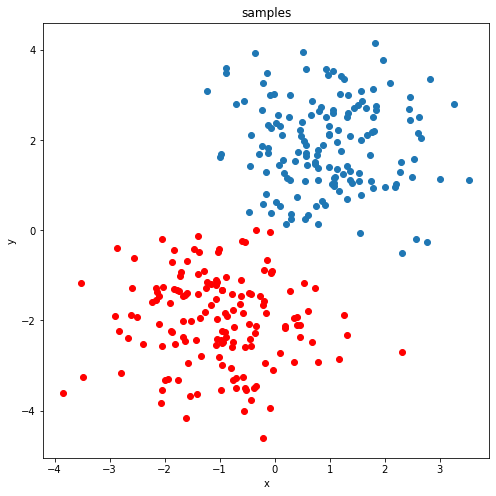

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(Xd[label,0],Xd[label,1])
plt.scatter(Xd[~label,0],Xd[~label,1],c='r')
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("samples") 
plt.show()

Apprentissage

In [12]:
classifier = svm.SVC(kernel='linear',C=10000000)
#classifier = svm.SVC(kernel='rbf',gamma=0.5)
classifier.fit(xapp, lab_app)
y_app_pred = classifier.decision_function(xapp)
lab_app_pred = np.sign(y_app_pred)
y_test_pred = classifier.decision_function(xt)
lab_test_pred = np.sign(y_test_pred)

eval_app=lab_app_pred-lab_app
eval_test=lab_test_pred-lab_test



In [13]:
print(y_app_pred, lab_app_pred,y_test_pred,lab_test_pred)

[ 22.68307907  14.75309399  20.01435321  20.50374477  20.20929377
  15.02395555  10.4375029   25.12759789   2.87292346  10.22549265
  12.63512465   7.91388196  21.96500836   7.7523267   29.78681747
  10.62278997   1.8999181    7.84127266  21.53407194  19.2831169
  16.18500691   8.70024388  14.96778503  19.67925882  10.6936662
  12.38232129  10.81031126   7.36174557  10.95228155   9.14780136
  13.40917579  18.29148537  24.99924981  19.74794379  10.91164018
  11.4620169   20.44368965  11.25393248  10.24294329  14.64789255
  11.45368914  13.66849089  24.17109745  19.46902534   4.55385243
   2.60477427  21.01902831   3.379765    10.04607247  17.24730147
  13.82834018  17.35670718  11.49349626  11.75838681  19.68334639
   4.95723302  17.46107435  14.14344552  15.28683715   8.9888368
   8.27592146  14.36642645  12.45226362  15.47404367  14.37103886
  25.07066264  16.8257362    9.38825604  10.66856898  16.8765537
  26.35065077  25.44176443  22.6976105   31.99086031  25.87412102
  11.66003362 

Parcours d'une grille 2D pour affichage de la valeur de la fonction SVM

In [ ]:
origin = 'lower'
nbs=100
delta=10/(nbs-1)
x = y = np.arange(-5.0, 5.0001, delta)
X, Y = np.meshgrid(x, y)
Xr=np.reshape(X,(nbs*nbs,1))
Yr=np.reshape(Y,(nbs*nbs,1))
Xmap=np.concatenate((Xr, Yr), axis=1)
Ymapr = classifier.decision_function(Xmap)
Ymap=np.reshape(Ymapr,(nbs,nbs))
Ymap.shape

fig1, ax1 = plt.subplots(constrained_layout=True,figsize=(10,8))
CS = ax1.contourf(X, Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#CS2 = ax1.contour(CS, levels=CS.levels[::1], colors='r', origin=origin)
CS2 = ax1.contour(CS, levels=(-1,0,1), colors='r', origin=origin)
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

ax1.scatter(Xd[lab_app==1,0],Xd[lab_app==1,1])
ax1.scatter(Xd[lab_app==-1,0],Xd[lab_app==-1,1],c='r')

plt.show()

Evaluation des perfromances

In [ ]:
[sum(abs(eval_app))/nbi,sum(abs(eval_test))/nbt/2]

In [ ]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(lab_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)
print(auc)
# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='Lineaire, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('Taux de faux Positif', fontsize=16)
plt.ylabel('Taux de vrai Positif', fontsize=16)
plt.title('SVM Courbe COR, AUC = %.3f'%auc, fontsize=16)

# afficher l'image
plt.show()